In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/raw/data.csv')

In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [8]:
df.columns[df.nunique()==len(df)]

Index(['TransactionId'], dtype='object')

In [9]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [24]:
df['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

In [28]:
account_check = df.groupby('SubscriptionId')['AccountId'].nunique()
account_check[account_check > 1]

SubscriptionId
SubscriptionId_3489    2
SubscriptionId_3495    2
SubscriptionId_375     2
SubscriptionId_3829    2
SubscriptionId_4674    3
SubscriptionId_4836    2
Name: AccountId, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [31]:
df['Value'].describe()

count    9.566200e+04
mean     9.900584e+03
std      1.231221e+05
min      2.000000e+00
25%      2.750000e+02
50%      1.000000e+03
75%      5.000000e+03
max      9.880000e+06
Name: Value, dtype: float64

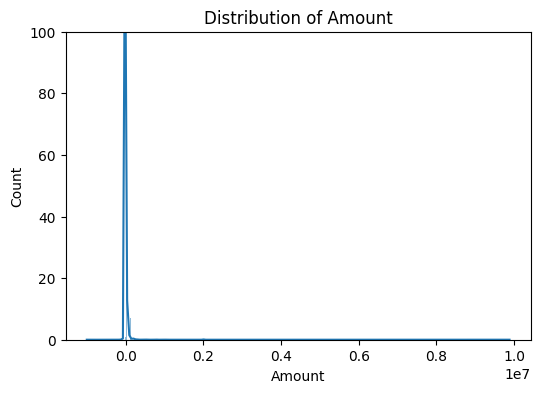

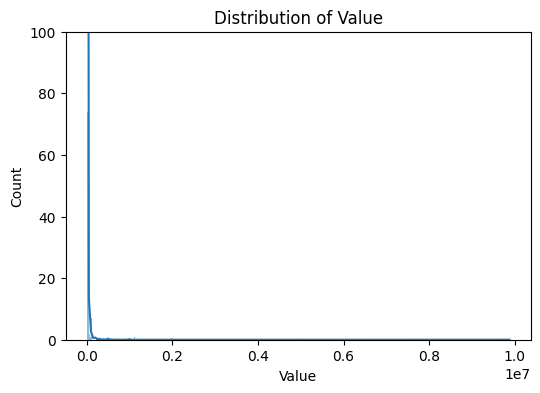

In [35]:
num_cols = ['Amount', 'Value']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.ylim(0, 100)

    plt.title(f'Distribution of {col}')
    plt.show()

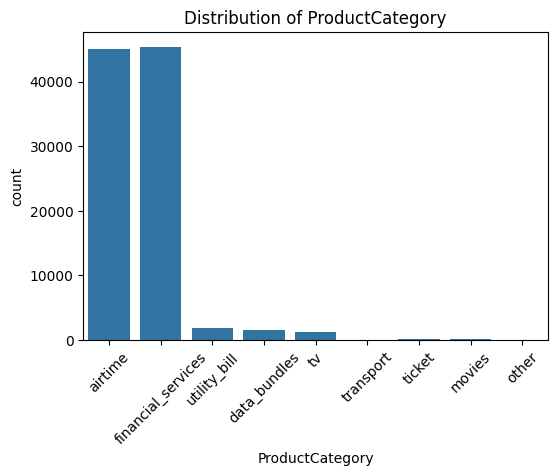

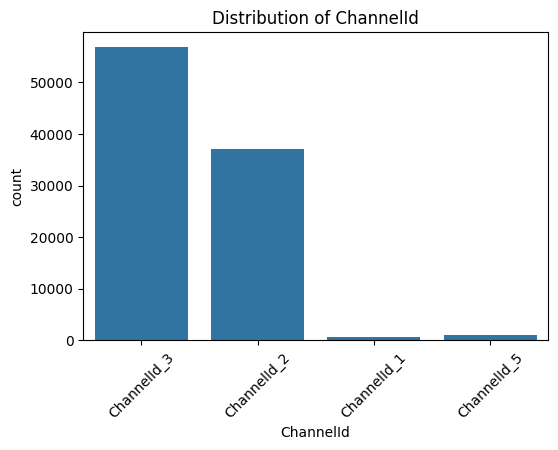

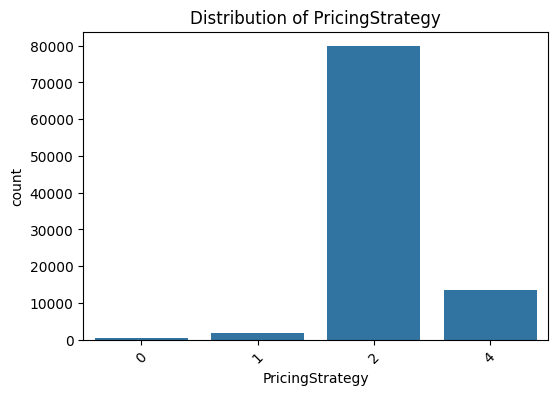

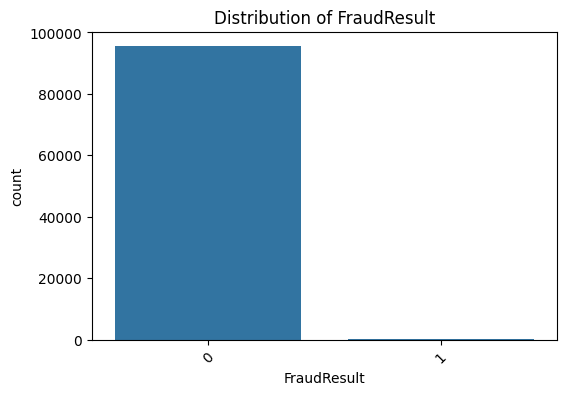

In [36]:
cat_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [37]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime'].describe()


count                                  95662
mean     2019-01-02 01:15:52.886433536+00:00
min                2018-11-15 02:18:49+00:00
25%      2018-12-12 09:47:57.750000128+00:00
50%                2018-12-31 17:20:45+00:00
75%         2019-01-25 10:54:47.500000+00:00
max                2019-02-13 10:01:28+00:00
Name: TransactionStartTime, dtype: object

In [38]:
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year


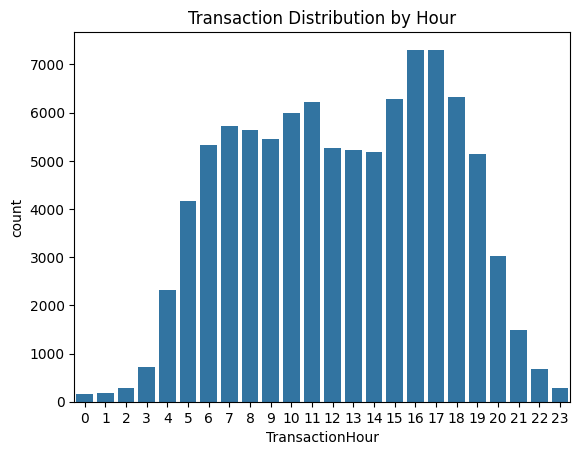

In [39]:
sns.countplot(x=df['TransactionHour'])
plt.title('Transaction Distribution by Hour')
plt.show()


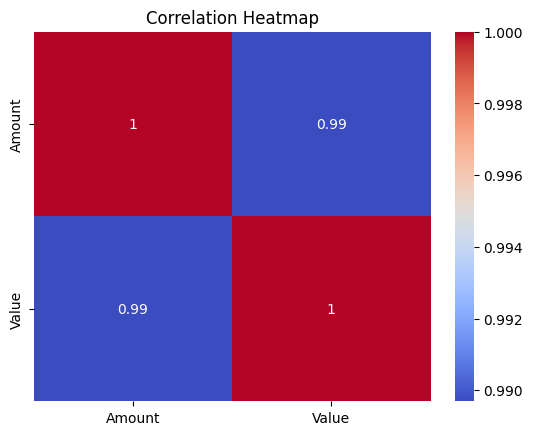

In [40]:
corr = df[['Amount', 'Value']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


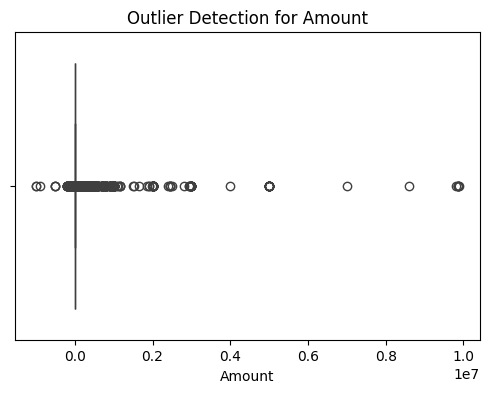

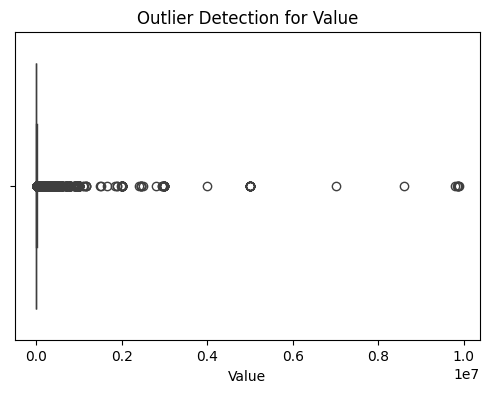

In [41]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection for {col}')
    plt.show()
